In [10]:
!pip install pandas numpy matplotlib seaborn scipy


   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---- ----------------------------------- 3.9/38.5 MB 20.2 MB/s eta 0:00:02
   -------- ------------------------------- 7.9/38.5 MB 19.1 MB/s eta 0:00:02
   ----------- ---------------------------- 11.5/38.5 MB 18.8 MB/s eta 0:00:02
   --------------- ------------------------ 15.2/38.5 MB 18.7 MB/s eta 0:00:02
   ------------------- -------------------- 19.1/38.5 MB 18.5 MB/s eta 0:00:02
   ----------------------- ---------------- 22.8/38.5 MB 18.5 MB/s eta 0:00:01
   --------------------------- ------------ 26.7/38.5 MB 18.5 MB/s eta 0:00:01
   ------------------------------- -------- 30.7/38.5 MB 18.5 MB/s eta 0:00:01
   ----------------------------------- ---- 34.3/38.5 MB 18.4 MB/s eta 0:00:01
   -------------------------------------- - 36.7/38.5 MB 18.4 MB/s eta 0:00:01
   -------------------------------------- - 36.7/38.5 MB 18.4 MB/s eta 0:00:01
   -------------------------------------- - 36.7/38.5 MB 18.4 M


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # Fixed typo: "matplolib" → "matplotlib"
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind   # Fixed typo: "form" → "from"
import scipy.stats as stats

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')


In [115]:
import sqlite3
import pandas as pd

# Create a database connection
conn = sqlite3.connect("inventory.db")

# Correct SQL query (no .csv extension)
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)

# Show first 5 rows
df.head()


,VendorNumber,VendorName,Brand,Price,PurchasePrice,TotalVolume,TOTALsalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,Revenue,COGS,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,4425,MARTIGNETTI COMPANIES,3405,28.99,23.19,3157000.0,810618.38,52297.96,27962,51379.56,58089042,6.129572e+08,3188443.28,810618.38,3836882.06,3026263.68,373.327790,0.000481,0.211270
1,3960,DIAGEO NORTH AMERICA INC,4261,22.99,16.17,2117500.0,596850.65,25397.90,28435,52246.70,120115336,1.121116e+09,5654705.54,653720.65,6114499.49,5460778.84,835.338281,0.000237,0.106913
2,17035,PERNOD RICARD USA,8068,24.99,18.24,4042500.0,514196.10,54261.90,21890,40222.05,69197436,1.013212e+09,5198769.24,547031.10,5598042.84,5051011.74,923.350014,0.000316,0.097718
3,3960,DIAGEO NORTH AMERICA INC,8082,33.99,21.73,3946250.0,483118.35,65372.45,16665,30620.15,223851308,2.089352e+09,10538314.87,566443.35,10900445.32,10334001.97,1824.366368,0.000074,0.051965
4,17035,PERNOD RICARD USA,5364,29.99,23.07,4042500.0,394218.55,69276.90,13145,24151.05,69197436,1.013212e+09,5198769.24,394218.55,5502024.39,5107805.84,1295.678714,0.000190,0.071650


In [47]:
# Summary staticstic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,2479.0,8.038565e+03,1.160800e+04,388.000000,3.252000e+03,6.785000e+03,9.552000e+03,9.845000e+04
Brand,2479.0,1.268598e+04,1.288664e+04,60.000000,3.618500e+03,6.596000e+03,1.918500e+04,9.063100e+04
Price,2479.0,1.870201e+01,1.861020e+01,0.000000,9.990000e+00,1.399000e+01,2.199000e+01,3.199900e+02
PurchasePrice,2479.0,1.296368e+01,1.365604e+01,0.000000,6.070000e+00,9.080000e+00,1.514000e+01,2.405900e+02
TotalVolume,2479.0,5.043927e+05,6.230143e+05,2750.000000,1.237500e+05,2.887500e+05,6.290625e+05,8.800000e+06
TOTALsalesDollars,2479.0,1.981799e+04,4.125550e+04,54.450000,3.958075e+03,9.066750e+03,1.978900e+04,8.106184e+05
TotalSalesPrice,2479.0,8.650716e+03,9.559216e+03,54.450000,2.747250e+03,5.606700e+03,1.084628e+04,1.055945e+05
TotalSalesQuantity,2479.0,1.565072e+03,3.019353e+03,54.000000,2.750000e+02,6.050000e+02,1.595000e+03,4.603500e+04
TotalExciseTax,2479.0,8.557251e+02,2.721545e+03,1.650000,6.450500e+01,2.073500e+02,6.789750e+02,5.224670e+04
TotalPurchaseQuantity,2479.0,1.803802e+07,2.918084e+07,3104.000000,2.155054e+06,7.519260e+06,2.119460e+07,2.566100e+08


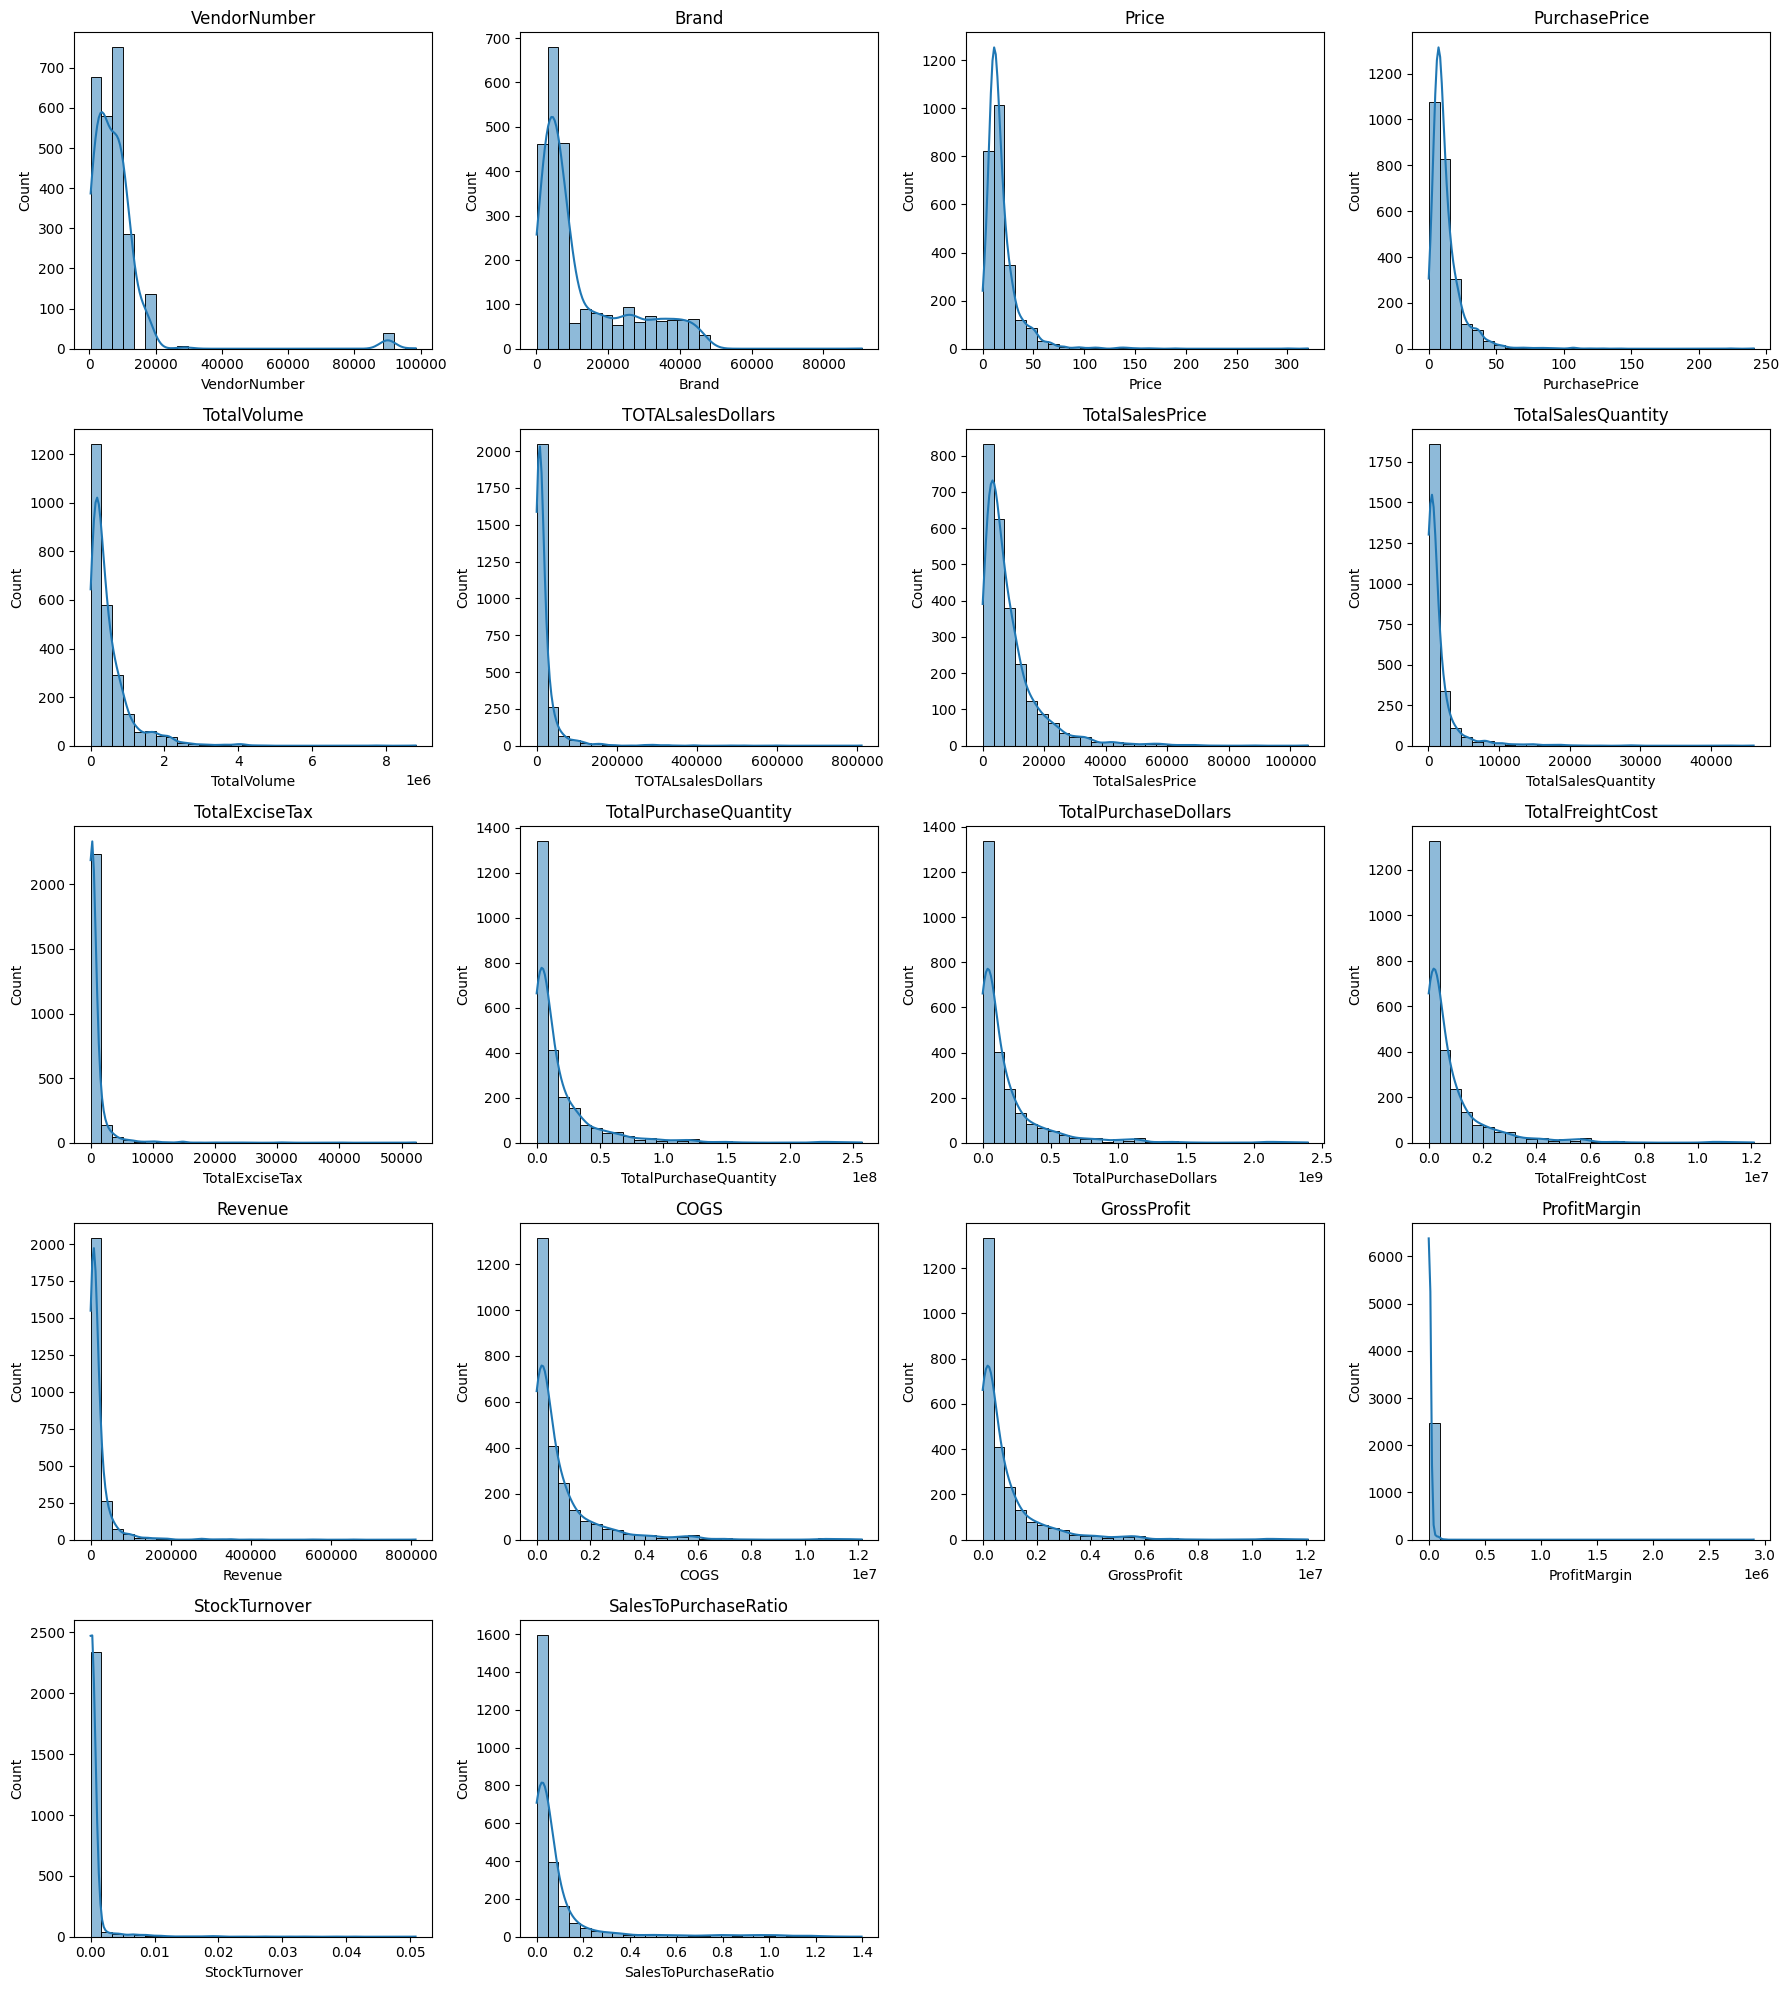

In [50]:
# Distribution plots for Numerical Columns

numerical_cols = df.select_dtypes(include=np.number).columns

# Create dynamic grid size
n_cols = 4  # Number of plots per row
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

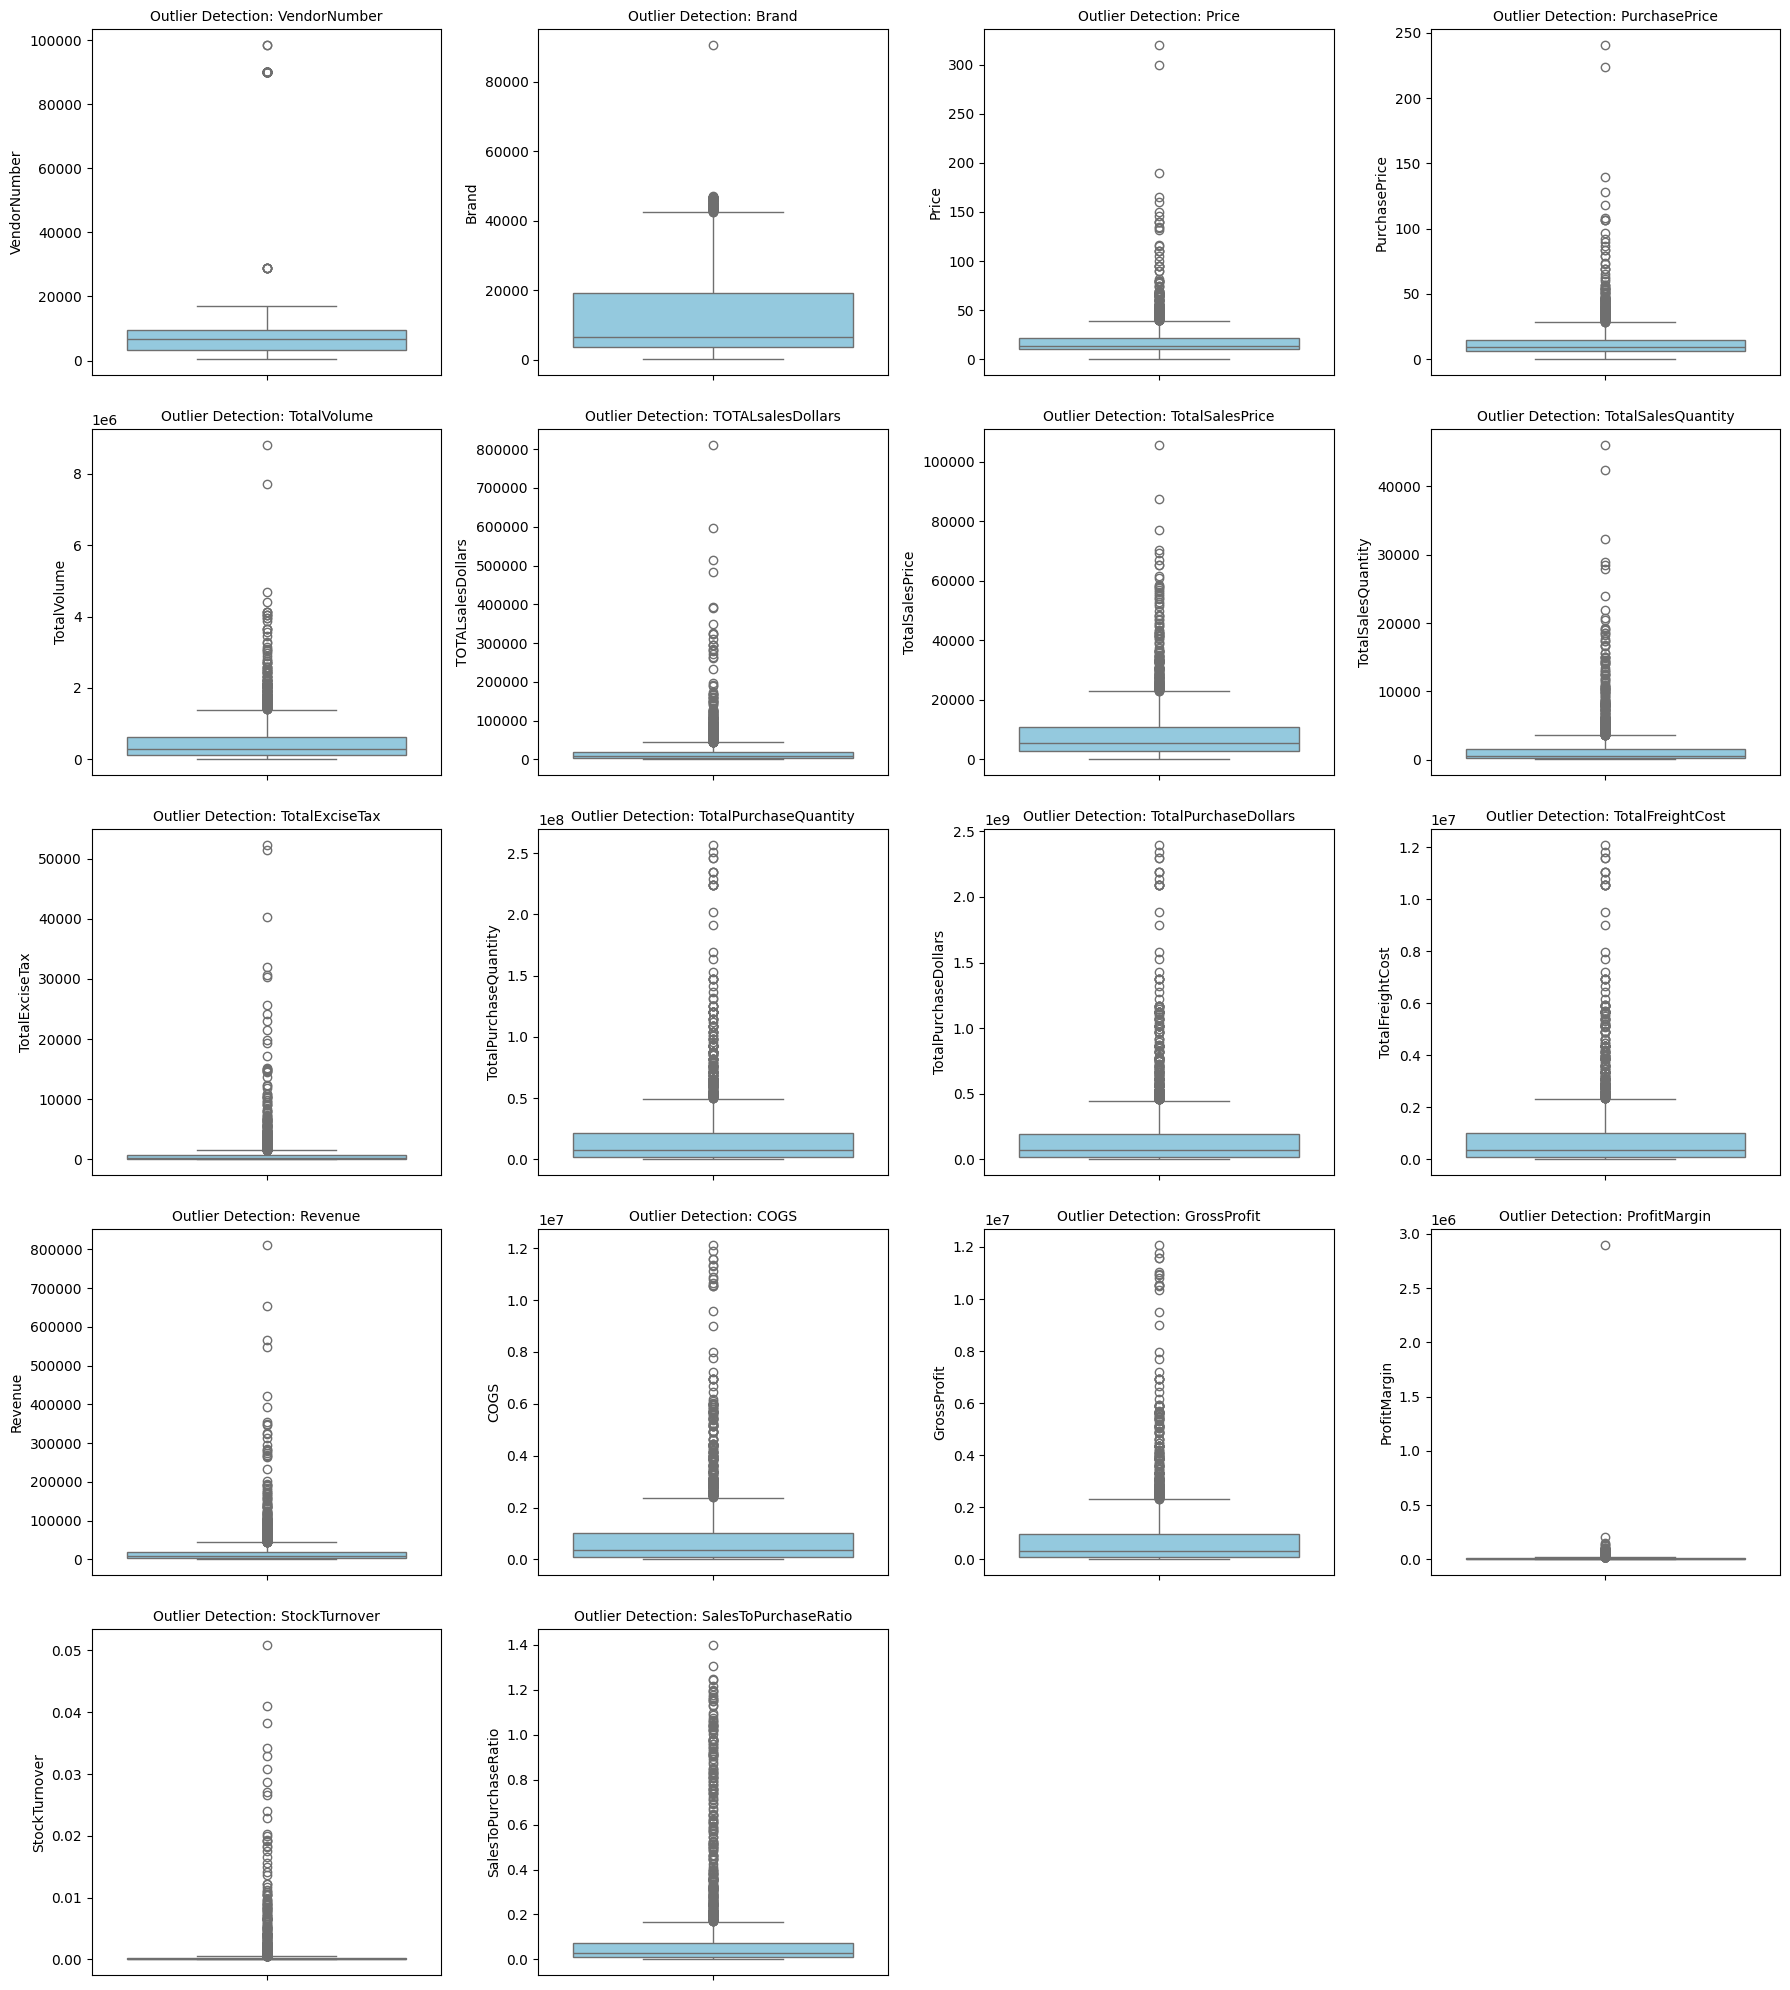

In [52]:
# Outlier Detection with Boxplots
numerical_cols = df.select_dtypes(include=np.number).columns

# Dynamic subplot grid
n_cols = 4  # Number of plots per row
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Outlier Detection: {col}", fontsize=10)

plt.tight_layout()
plt.show()

In [53]:
# let's filter the data by removing inconsistencies

df = pd.read_sql_query("""SELECT* FROM vendor_sales_summary
WHERE GrossProfit>0
AND ProfitMargin>0
AND TotalSalesQuantity>0""",conn)

In [54]:
df['GrossProfit']

0        3026263.68
1        5460778.84
2        5051011.74
3       10334001.97
4        5107805.84
           ...     
2474       61856.36
2475        7677.76
2476       14042.37
2477       79517.44
2478       50278.77
Name: GrossProfit, Length: 2479, dtype: float64

In [55]:
df.head()

,VendorNumber,VendorName,Brand,Price,PurchasePrice,TotalVolume,TOTALsalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,Revenue,COGS,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,4425,MARTIGNETTI COMPANIES,3405,28.99,23.19,3157000.0,810618.38,52297.96,27962,51379.56,58089042,6.129572e+08,3188443.28,810618.38,3836882.06,3026263.68,373.327790,0.000481,0.211270
1,3960,DIAGEO NORTH AMERICA INC,4261,22.99,16.17,2117500.0,596850.65,25397.90,28435,52246.70,120115336,1.121116e+09,5654705.54,653720.65,6114499.49,5460778.84,835.338281,0.000237,0.106913
2,17035,PERNOD RICARD USA,8068,24.99,18.24,4042500.0,514196.10,54261.90,21890,40222.05,69197436,1.013212e+09,5198769.24,547031.10,5598042.84,5051011.74,923.350014,0.000316,0.097718
3,3960,DIAGEO NORTH AMERICA INC,8082,33.99,21.73,3946250.0,483118.35,65372.45,16665,30620.15,223851308,2.089352e+09,10538314.87,566443.35,10900445.32,10334001.97,1824.366368,0.000074,0.051965
4,17035,PERNOD RICARD USA,5364,29.99,23.07,4042500.0,394218.55,69276.90,13145,24151.05,69197436,1.013212e+09,5198769.24,394218.55,5502024.39,5107805.84,1295.678714,0.000190,0.071650


In [57]:
df.shape

(2479, 19)

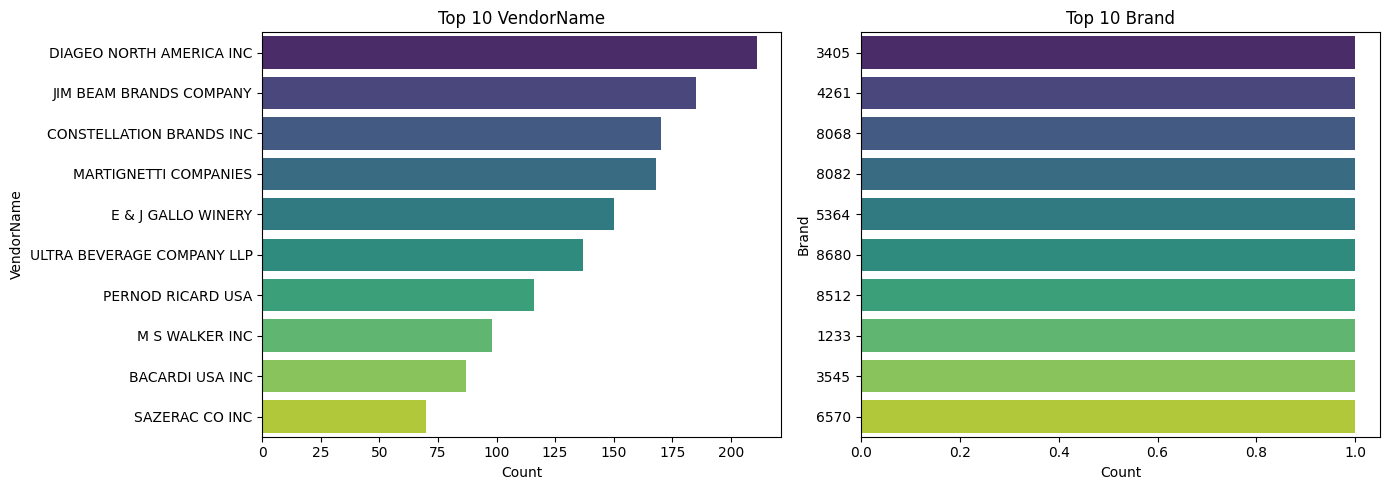

In [61]:
# Select categorical columns from your dataset
categorical_col = ["VendorName", "Brand"]  # Updated to existing columns only

# Check if columns actually exist in df
categorical_col = [col for col in categorical_col if col in df.columns]

if not categorical_col:
    print("⚠️ No categorical columns found in the dataset.")
else:
    # Create dynamic subplot layout
    n_cols = 2
    n_rows = int(np.ceil(len(categorical_col) / n_cols))

    plt.figure(figsize=(14, n_rows * 5))

    for i, col in enumerate(categorical_col, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette="viridis")
        plt.title(f"Top 10 {col}", fontsize=12)
        plt.xlabel("Count")
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()

In [60]:
print(df.columns)


Index(['VendorNumber', 'VendorName', 'Brand', 'Price', 'PurchasePrice',
       'TotalVolume', 'TOTALsalesDollars', 'TotalSalesPrice',
       'TotalSalesQuantity', 'TotalExciseTax', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalFreightCost', 'Revenue', 'COGS',
       'GrossProfit', 'ProfitMargin', 'StockTurnover', 'SalesToPurchaseRatio'],
      dtype='object')


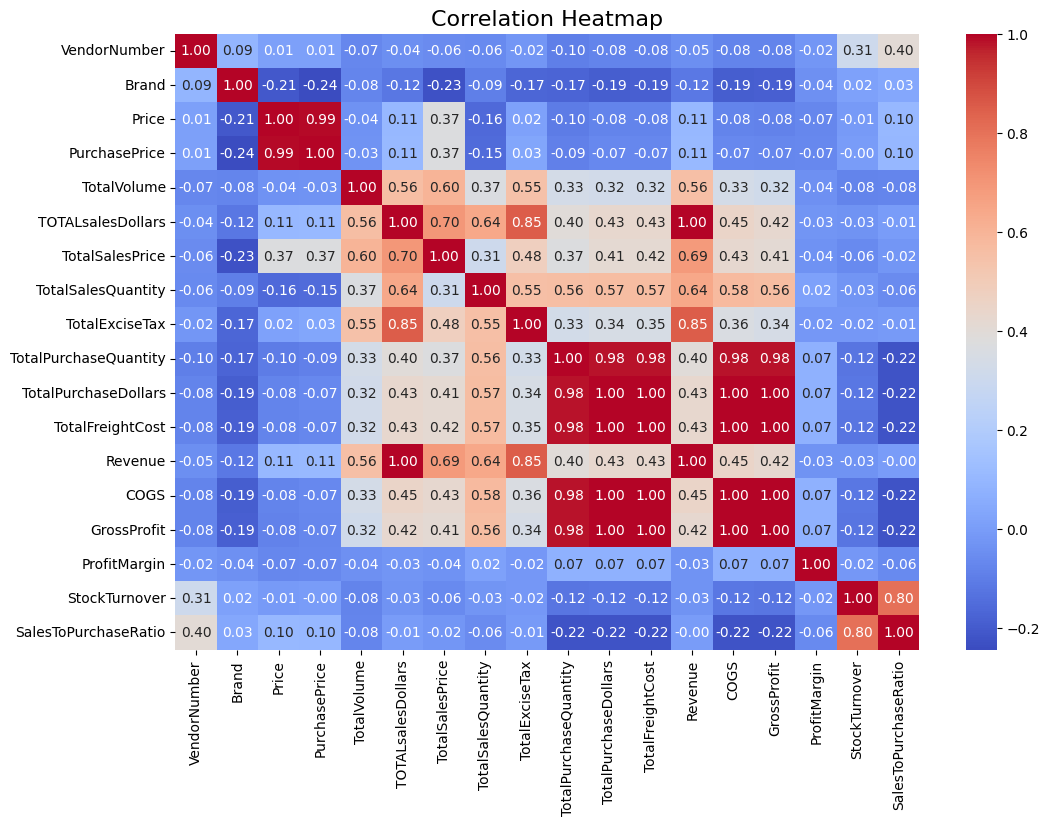

In [64]:
correlation_matrix = df[numerical_cols].corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Set title
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [81]:
# Step 1: Aggregate brand performance
Brand_performance = df.groupby('VendorName').agg({
    'TOTALsalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()

# Step 2: Define thresholds
low_sales_threshold = 50000   # You can adjust this based on your data
high_margin_threshold = 0.30  # 30% profit margin

# Step 3: Filter brands with low sales but high margins
target_brands = Brand_performance[
    (Brand_performance['TOTALsalesDollars'] <= low_sales_threshold) &
    (Brand_performance['ProfitMargin'] >= high_margin_threshold)
]

# Step 4: Display results
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TOTALsalesDollars'))


Brands with Low Sales but High Profit Margins:


,VendorName,TOTALsalesDollars,ProfitMargin
67,STELLAR IMPORTING CO LLC,967.98,28.462365
12,CRUSH WINES,1401.95,61.186298
1,ATLANTIC IMPORTING COMPANY,2966.94,23.264340
76,TY KU LLC,3497.50,3.165512
17,DJINN SPIRITS LLC,3517.47,13.617212
81,WEIN BAUER INC,3973.41,6.870673
50,POVERTY LANE ORCHARDS,6762.36,4.014871
69,SURVILLE ENTERPRISES CORP,8093.52,16.392802
59,SEA BREEZE CELLARS LLC,8104.23,16.621843
51,PREMIER DISTRIBUTORS,8527.68,7.234880


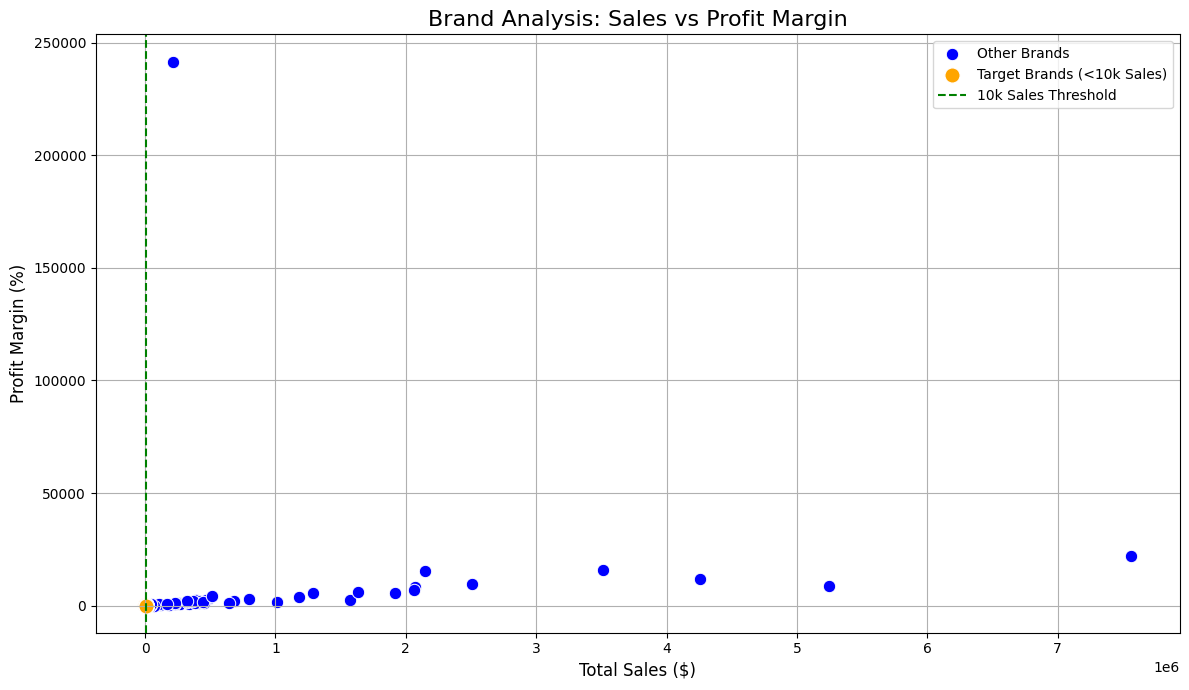

In [83]:

# Define target brands (TOTALsalesDollars < 10,000)
target_brands = Brand_performance[Brand_performance['TOTALsalesDollars'] < 10000]

plt.figure(figsize=(12,7))

# Scatter plot for all brands (blue)
sns.scatterplot(
    data=Brand_performance,
    x='TOTALsalesDollars',
    y='ProfitMargin',
    color='blue',
    s=80,
    label='Other Brands'
)

# Scatter plot for target brands (orange)
sns.scatterplot(
    data=target_brands,
    x='TOTALsalesDollars',
    y='ProfitMargin',
    color='orange',
    s=120,
    label='Target Brands (<10k Sales)'
)

# Threshold line for 10,000 sales
plt.axvline(x=10000, color='green', linestyle='--', label='10k Sales Threshold')

# Beautify the plot
plt.title('Brand Analysis: Sales vs Profit Margin', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Profit Margin (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [84]:
# TOP vendro and brands by sales Performance
top_vendors = df.groupby("VendorName")["TOTALsalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      7560980.90
MARTIGNETTI COMPANIES         5243629.40
PERNOD RICARD USA             4253459.65
JIM BEAM BRANDS COMPANY       3515688.00
CONSTELLATION BRANDS INC      2504899.10
BACARDI USA INC               2147748.90
E & J GALLO WINERY            2069940.95
SAZERAC CO INC                2066204.25
BROWN-FORMAN CORP             1919261.85
ULTRA BEVERAGE COMPANY LLP    1636605.85
Name: TOTALsalesDollars, dtype: float64

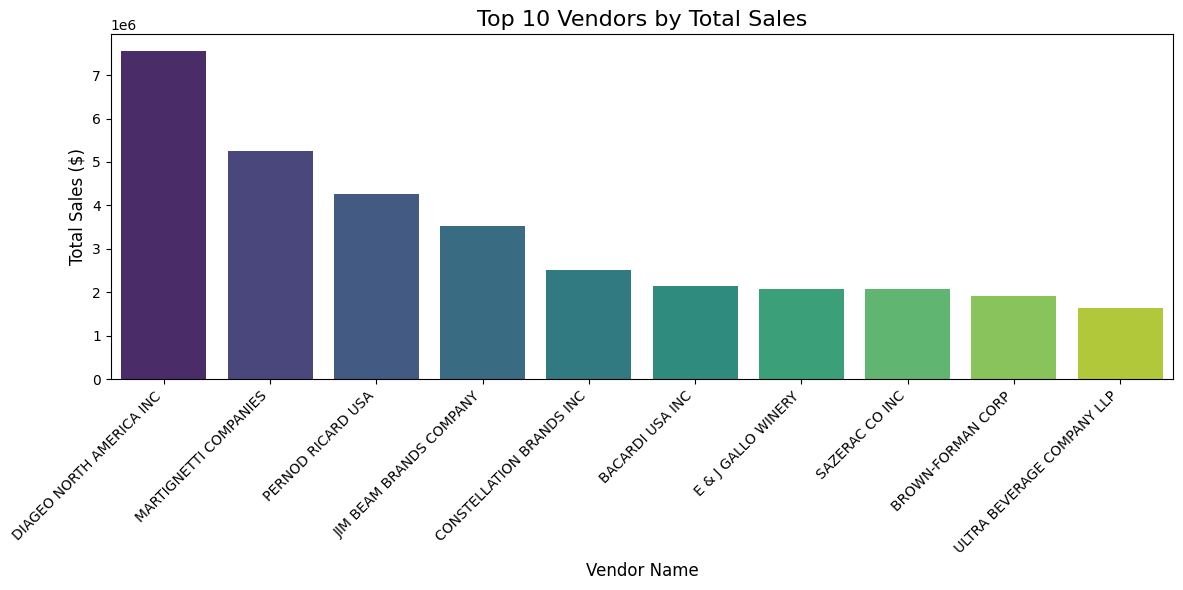

In [86]:

# If top_vendors is a Series, convert it to a DataFrame
if isinstance(top_vendors, pd.Series):
    top_vendors = top_vendors.reset_index()

# Rename columns if needed
top_vendors.columns = ["VendorName", "TOTALsalesDollars"]

# Take top 10 vendors based on sales
top_10_vendors = top_vendors.sort_values(by="TOTALsalesDollars", ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_vendors,
    x="VendorName",
    y="TOTALsalesDollars",
    palette="viridis"
)

# Beautify the plot
plt.title("Top 10 Vendors by Total Sales", fontsize=16)
plt.xlabel("Vendor Name", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [88]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TOTALsalesDollars':'sum'
})

In [89]:
vendor_performance

,TotalPurchaseDollars,GrossProfit,TOTALsalesDollars
VendorName,,,
AMERICAN VINTAGE BEVERAGE,4.221647e+06,13492.47,28578.00
ATLANTIC IMPORTING COMPANY,8.223264e+04,813.54,2966.94
BACARDI USA INC,1.980980e+10,99680298.93,2147748.90
BANFI PRODUCTS CORP,3.225156e+08,1580754.23,263068.30
BROWN-FORMAN CORP,9.822368e+09,49249457.73,1919261.85
...,...,...,...
WEIN BAUER INC,1.305510e+05,273.00,3973.41
WESTERN SPIRITS BEVERAGE CO,1.697871e+07,78710.43,47355.55
WILLIAM GRANT & SONS INC,2.211436e+09,10951051.97,1013987.15


In [92]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()

In [96]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [97]:
vendor_performance

,TotalPurchaseDollars,GrossProfit,TOTALsalesDollars,PurchaseContribution%
VendorName,,,,
DIAGEO NORTH AMERICA INC,1.477834e+11,7.431949e+08,7560980.90,0.35
JIM BEAM BRANDS COMPANY,5.898308e+10,3.008922e+08,3515688.00,0.14
MARTIGNETTI COMPANIES,4.028800e+10,2.077835e+08,5243629.40,0.10
PERNOD RICARD USA,3.490756e+10,1.779705e+08,4253459.65,0.08
CONSTELLATION BRANDS INC,2.596172e+10,1.315817e+08,2504899.10,0.06
...,...,...,...,...
TY KU LLC,1.946074e+05,1.028000e+02,3497.50,0.00
DJINN SPIRITS LLC,1.464923e+05,5.206500e+02,3517.47,0.00
WEIN BAUER INC,1.305510e+05,2.730000e+02,3973.41,0.00


In [108]:
# If top_vendors is already your TOP-10 table with columns: VendorName, TOTALsalesDollars
# make sure it's a DataFrame (not a Series)
if isinstance(top_vendors, pd.Series):
    top_vendors = top_vendors.reset_index()
    top_vendors.columns = ["VendorName", "TOTALsalesDollars"]

# Denominator = total sales across ALL vendors (from the full df)
overall_total_sales = df['TOTALsalesDollars'].sum()

# Contribution of each top-10 vendor relative to ALL sales
top_vendors = top_vendors.sort_values('TOTALsalesDollars', ascending=False).head(10).copy()
top_vendors['SalesContribution%'] = (top_vendors['TOTALsalesDollars'] / overall_total_sales) * 100

# This will now be < 100 (the share of the top 10 only)
print("Top-10 combined contribution (%):", top_vendors['SalesContribution%'].sum())

# (optional) see the table
display(top_vendors)


Top-10 combined contribution (%): 67.00433931906174


,VendorName,TOTALsalesDollars,PurchaseContribution%,SalesContribution%
0,DIAGEO NORTH AMERICA INC,7560980.90,22.968846,15.390123
1,MARTIGNETTI COMPANIES,5243629.40,15.929165,10.673232
2,PERNOD RICARD USA,4253459.65,12.921215,8.657775
3,JIM BEAM BRANDS COMPANY,3515688.00,10.680003,7.156065
4,CONSTELLATION BRANDS INC,2504899.10,7.609415,5.098638
5,BACARDI USA INC,2147748.90,6.524459,4.371671
6,E & J GALLO WINERY,2069940.95,6.288093,4.213295
7,SAZERAC CO INC,2066204.25,6.276742,4.205690
8,BROWN-FORMAN CORP,1919261.85,5.830359,3.906593
9,ULTRA BEVERAGE COMPANY LLP,1636605.85,4.971702,3.331256


In [112]:
top_vendors['PurchaseContribution%'].sum()

np.float64(100.0)

In [116]:
df.head()

,VendorNumber,VendorName,Brand,Price,PurchasePrice,TotalVolume,TOTALsalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,Revenue,COGS,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,4425,MARTIGNETTI COMPANIES,3405,28.99,23.19,3157000.0,810618.38,52297.96,27962,51379.56,58089042,6.129572e+08,3188443.28,810618.38,3836882.06,3026263.68,373.327790,0.000481,0.211270
1,3960,DIAGEO NORTH AMERICA INC,4261,22.99,16.17,2117500.0,596850.65,25397.90,28435,52246.70,120115336,1.121116e+09,5654705.54,653720.65,6114499.49,5460778.84,835.338281,0.000237,0.106913
2,17035,PERNOD RICARD USA,8068,24.99,18.24,4042500.0,514196.10,54261.90,21890,40222.05,69197436,1.013212e+09,5198769.24,547031.10,5598042.84,5051011.74,923.350014,0.000316,0.097718
3,3960,DIAGEO NORTH AMERICA INC,8082,33.99,21.73,3946250.0,483118.35,65372.45,16665,30620.15,223851308,2.089352e+09,10538314.87,566443.35,10900445.32,10334001.97,1824.366368,0.000074,0.051965
4,17035,PERNOD RICARD USA,5364,29.99,23.07,4042500.0,394218.55,69276.90,13145,24151.05,69197436,1.013212e+09,5198769.24,394218.55,5502024.39,5107805.84,1295.678714,0.000190,0.071650


In [117]:
df.columns = df.columns.str.strip()

# 2. Drop completely empty rows & columns
df = df.dropna(axis=0, how="all")  # Empty rows
df = df.dropna(axis=1, how="all")  # Empty columns

# 3. Convert all column names to proper format (no special chars)
df.columns = df.columns.str.replace(r'[^A-Za-z0-9_]+', '_', regex=True)

# 4. Save the cleaned dataset for Power BI
df.to_csv("vendor_sales_summary_clean.csv", index=False, encoding="utf-8")

print(" Cleaned file saved as vendor_sales_summary_clean.csv")


 Cleaned file saved as vendor_sales_summary_clean.csv
